In [ ]:
import utils
import matplotlib.pyplot as plt
from sklearn.svm import SVC

### Problem formulation

$$
argmin_{\mathbf{w}, b, \boldsymbol{\xi}} \quad \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^N \xi_i
$$
Subject to:
$$
y_i (\mathbf{w}^\top \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0 \quad \forall i
$$

- $\mathbf{w}$: Weight vector determining the hyperplane.
- $b$: Bias term shifting the hyperplane.
- $\xi_i$: Slack variable representing the margin violation for the $i$-th training point.
- $C$: Regularization parameter controlling the trade-off between margin size.
- $y_i$: Label of the $i$-th training point ($+1$ or $-1$).
- $\mathbf{x}_i$: Feature vector of the $i$-th training point.

### Interpretation of C
A small $C$ reduces the penalty for margin violations $C \sum_{} \xi_i$, allowing the model to focus on minimizing $\frac{1}{2} \|\mathbf{w}\|^2$ (i.e., maximizing the margin). This leads to a **better generalization**, especially when data is noisy or not linearly separable.

With a large $C$ reduces the penalty for margin violations. $C \sum_{} \xi_i$ dominates. Thise emphasizes minimizing classification errors. The model sacrifices the margin size and risks overfitting to the training data.

### Effect of C in SVM

| Property                   | Large $C$                           | Small $C$                          |
|----------------------------|----------------------------------------|---------------------------------------|
| **Slack Penalty**          | High ($C \sum \xi_i$ dominates)     | Low ($\frac{1}{2} \|\mathbf{w}\|^2$ dominates) |
| **Margin Size**            | Small                                | Large                                |
| **Misclassification Tolerance** | Low (fits training data tightly)  | High (tolerates errors)              |
| **Overfitting Risk**       | High                                 | Low                                  |
| **Generalization**         | Low (sensitive to noise)             | High (ignores outliers)              |


Iris Dataset and Linear SVM

In [2]:
def linear_svc_iris(name):
    X, y, xbounds, ybounds = utils.get_data(name=name)

    fig, axes = plt.subplots(2,2, figsize=(19.2,10.8))
    axes = axes.ravel()
    for i, c_param in enumerate([0.01, 0.1, 1, 100]):
        model = SVC(C=c_param, kernel="linear")
        model.fit(X, y)
        print("#########")
        print("C=%.2f" % c_param)
        print("#########")
        utils.apply_cross_validation(model, X, y)
        utils.decision_boundary(axes[i], model, X, y, xbounds, ybounds, margin=0.1)
        axes[i].set_title(r"C=%.2f" % c_param)

    plt.show()

#########
C=0.01
#########
fold 0: 0.000000%
fold 1: 0.000000%
fold 2: 0.000000%
fold 3: 0.000000%
fold 4: 0.000000%
risk: 0.000000
#########
C=0.10
#########
fold 0: 0.000000%
fold 1: 0.000000%
fold 2: 0.000000%
fold 3: 0.000000%
fold 4: 0.000000%
risk: 0.000000
#########
C=1.00
#########
fold 0: 0.000000%
fold 1: 0.000000%
fold 2: 0.000000%
fold 3: 0.000000%
fold 4: 0.000000%
risk: 0.000000
#########
C=100.00
#########
fold 0: 0.000000%
fold 1: 0.000000%
fold 2: 0.000000%
fold 3: 0.000000%
fold 4: 0.000000%
risk: 0.000000


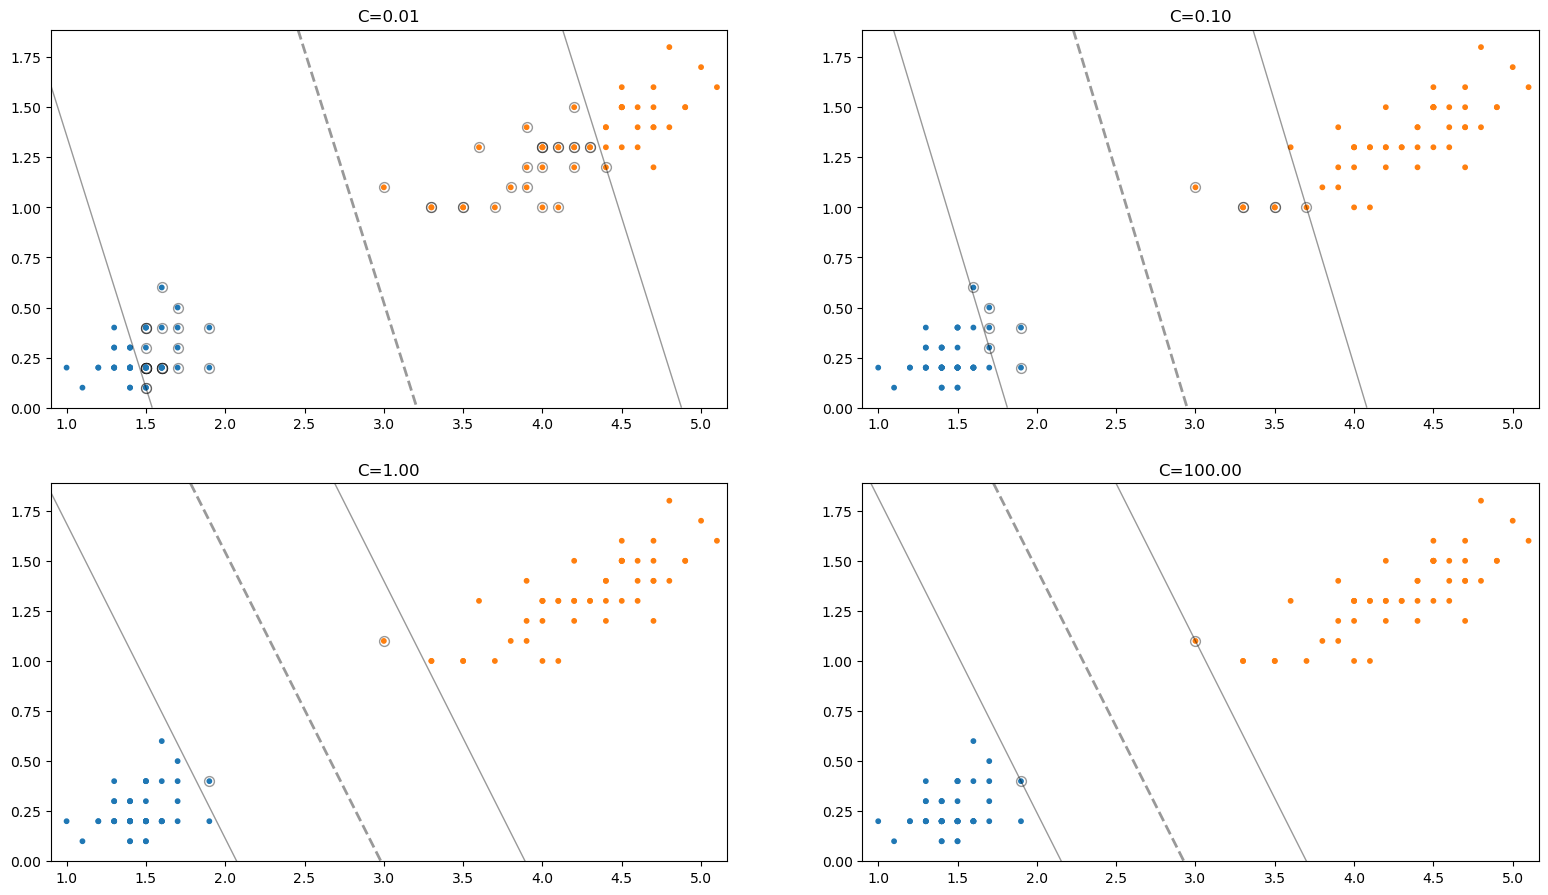

In [3]:
linear_svc_iris("iris1")

#########
C=0.01
#########
fold 0: 0.050000%
fold 1: 0.000000%
fold 2: 0.100000%
fold 3: 0.100000%
fold 4: 0.000000%
risk: 0.050000
#########
C=0.10
#########
fold 0: 0.050000%
fold 1: 0.050000%
fold 2: 0.100000%
fold 3: 0.100000%
fold 4: 0.000000%
risk: 0.060000
#########
C=1.00
#########
fold 0: 0.050000%
fold 1: 0.050000%
fold 2: 0.100000%
fold 3: 0.100000%
fold 4: 0.000000%
risk: 0.060000
#########
C=100.00
#########
fold 0: 0.050000%
fold 1: 0.050000%
fold 2: 0.100000%
fold 3: 0.100000%
fold 4: 0.000000%
risk: 0.060000


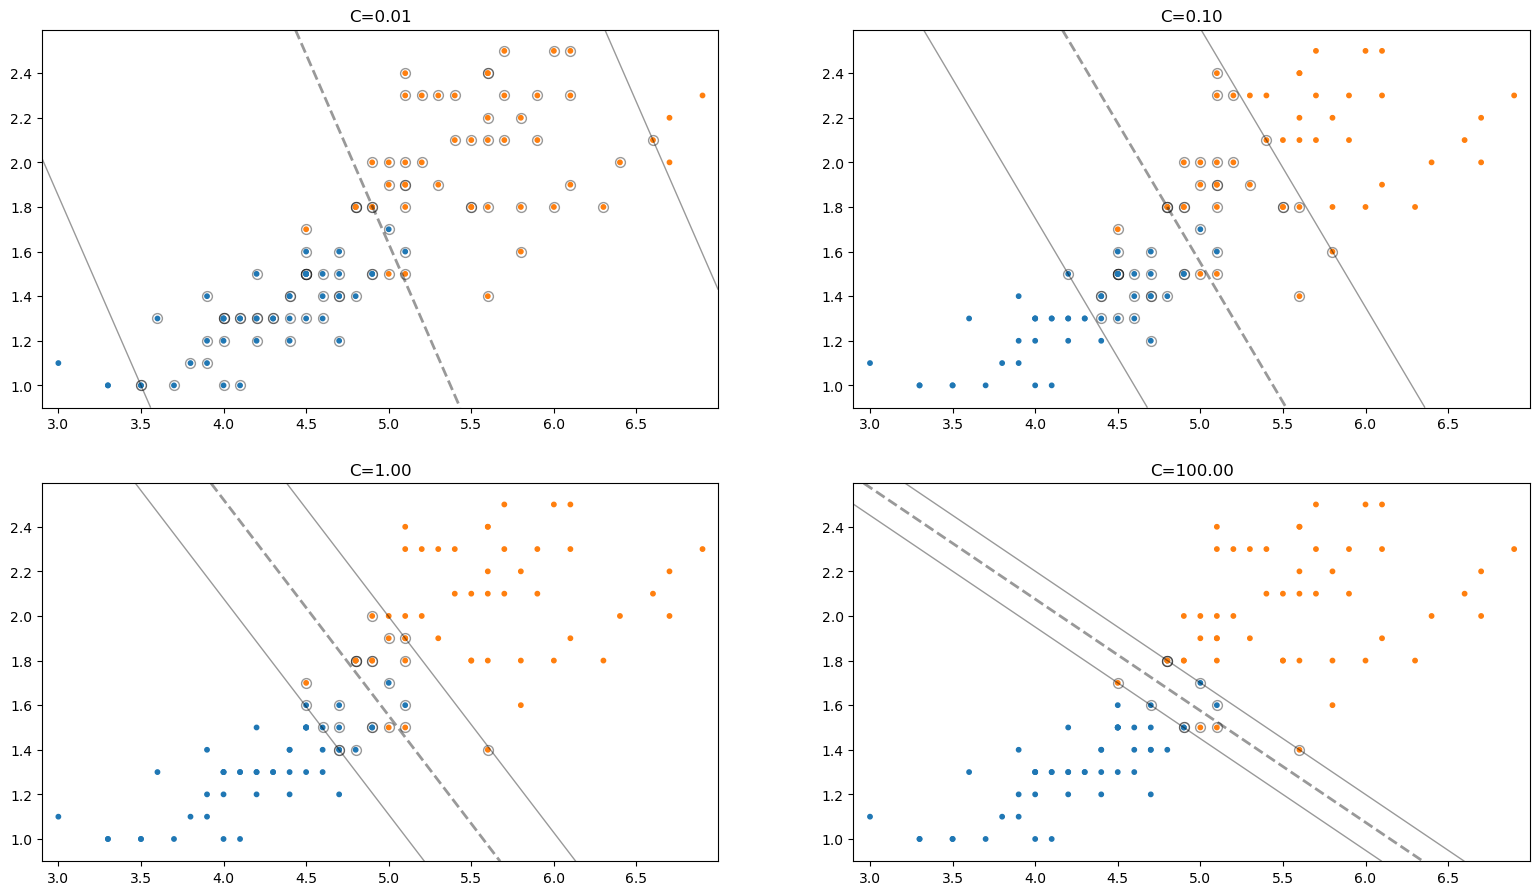

In [4]:
linear_svc_iris("iris2")

Moons dataset and kernel SVM

#########
C=1.0
#########
fold 0: 0.100000%
fold 1: 0.050000%
fold 2: 0.200000%
fold 3: 0.150000%
fold 4: 0.100000%
risk: 0.120000
#########
Polynomial kernel: C=1.0, d=2, coef0=1.
#########
fold 0: 0.050000%
fold 1: 0.050000%
fold 2: 0.250000%
fold 3: 0.150000%
fold 4: 0.050000%
risk: 0.110000
#########
Polynomial kernel: C=1.0, d=3, coef0=1.
#########
fold 0: 0.050000%
fold 1: 0.000000%
fold 2: 0.000000%
fold 3: 0.000000%
fold 4: 0.000000%
risk: 0.010000
#########
Polynomial kernel: C=1.0, d=4, coef0=1.
#########
fold 0: 0.000000%
fold 1: 0.000000%
fold 2: 0.000000%
fold 3: 0.000000%
fold 4: 0.050000%
risk: 0.010000


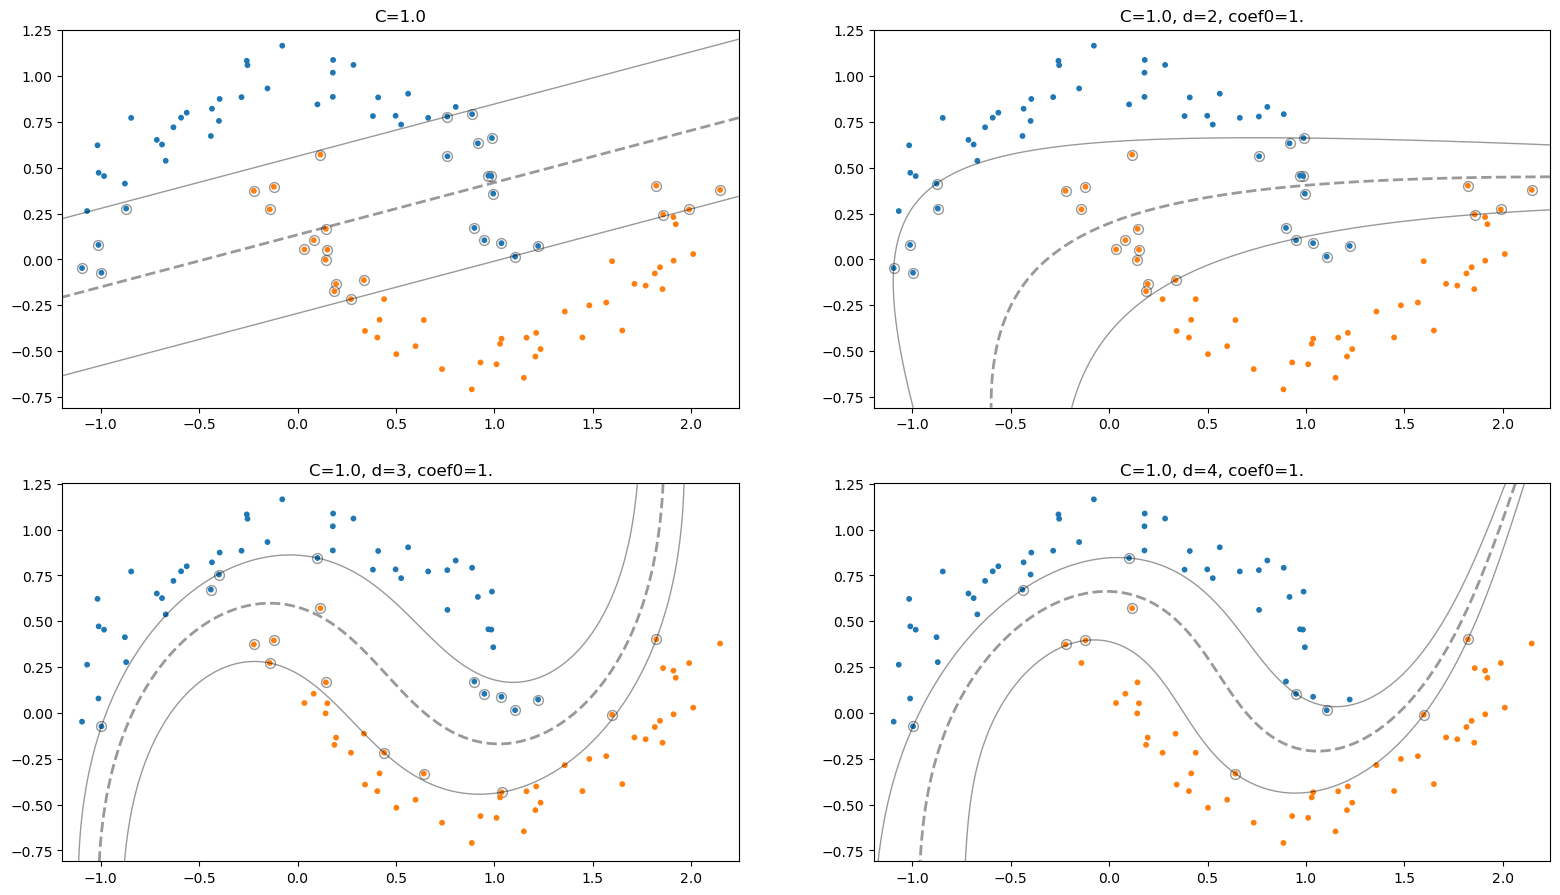

In [5]:
X, y, xbounds, ybounds = utils.get_data(name="moons", n=100)


fig, axes = plt.subplots(2,2, figsize=(19.2,10.8))
axes = axes.ravel()
model = SVC(C=1., kernel="linear")
model.fit(X, y)
print("#########")
print("C=1.0")
print("#########")
utils.apply_cross_validation(model, X, y)
utils.decision_boundary(axes[0], model, X, y, xbounds, ybounds, margin=0.1)
axes[0].set_title(r"C=1.0")
for i, d in enumerate([2, 3, 4]):
    model = SVC(C=1., kernel="poly", degree=d, coef0=1.)
    model.fit(X, y)
    print("#########")
    print("Polynomial kernel: C=1.0, d=%d, coef0=1." % d)
    print("#########")
    utils.apply_cross_validation(model, X, y)
    utils.decision_boundary(axes[i+1], model, X, y, xbounds, ybounds, margin=0.1)
    axes[i+1].set_title(r"C=1.0, d=%d, coef0=1." % d)
plt.show()

#########
Polynomial kernel: C=0.10, d=3, coef0=1.
#########
fold 0: 0.150000%
fold 1: 0.050000%
fold 2: 0.000000%
fold 3: 0.050000%
fold 4: 0.100000%
risk: 0.070000
#########
Polynomial kernel: C=1.00, d=3, coef0=1.
#########
fold 0: 0.000000%
fold 1: 0.000000%
fold 2: 0.000000%
fold 3: 0.000000%
fold 4: 0.000000%
risk: 0.000000
#########
Polynomial kernel: C=10.00, d=3, coef0=1.
#########
fold 0: 0.000000%
fold 1: 0.000000%
fold 2: 0.000000%
fold 3: 0.000000%
fold 4: 0.050000%
risk: 0.010000
#########
Polynomial kernel: C=100.00, d=3, coef0=1.
#########
fold 0: 0.000000%
fold 1: 0.000000%
fold 2: 0.000000%
fold 3: 0.000000%
fold 4: 0.050000%
risk: 0.010000


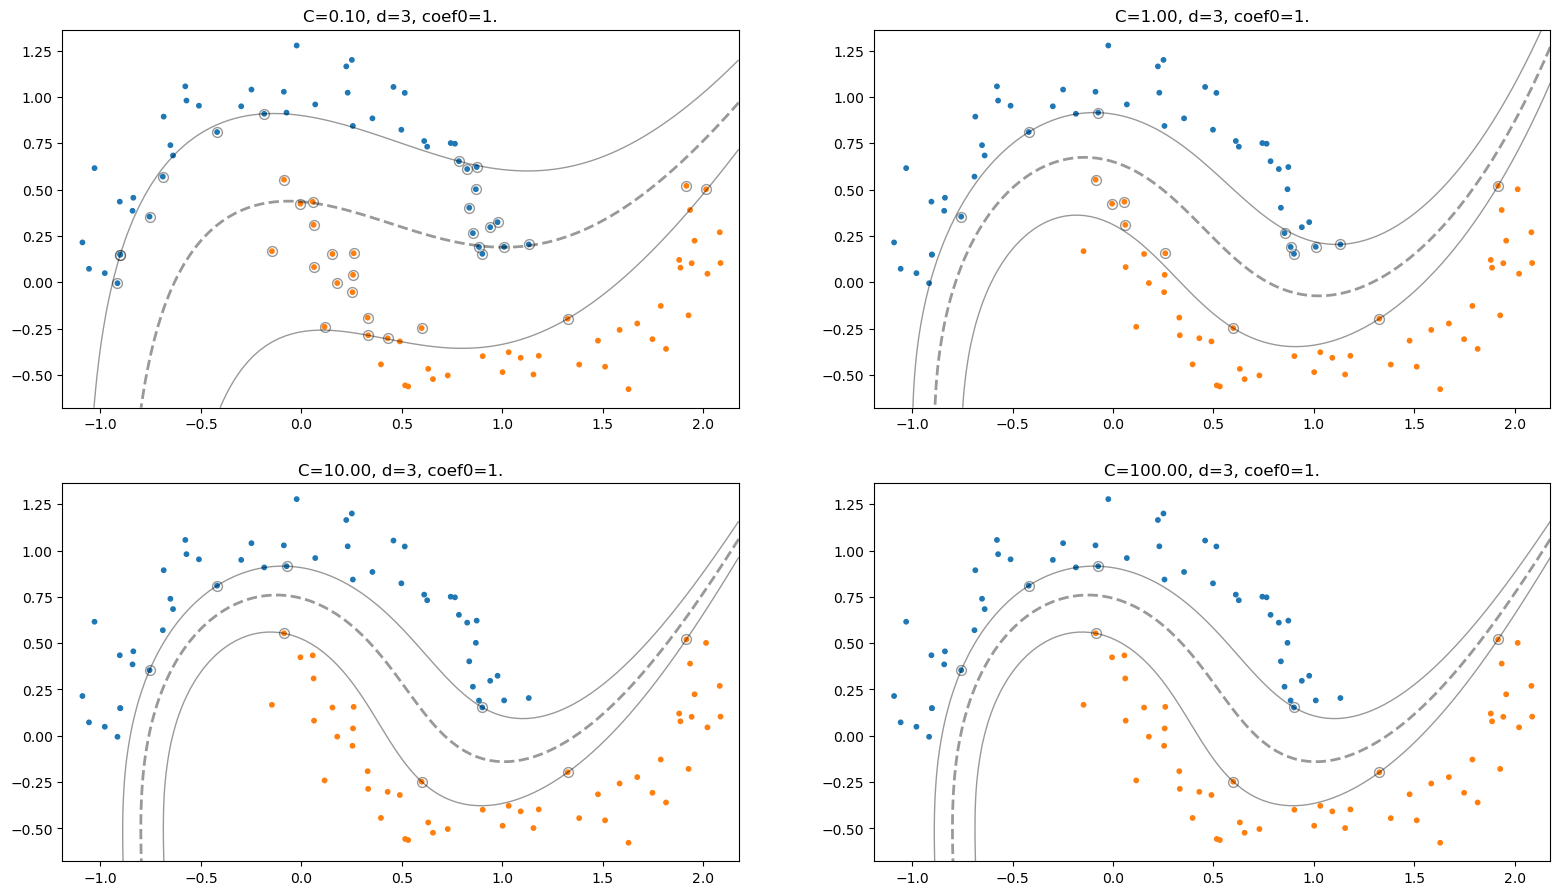

In [6]:
X, y, xbounds, ybounds = utils.get_data(name="moons", n=100)

fig, axes = plt.subplots(2,2, figsize=(19.2,10.8))
axes = axes.ravel()
for i, c_param in enumerate([0.1, 1, 10, 100]):
    model = SVC(C=c_param, kernel="poly", degree=3, coef0=1.)
    model.fit(X, y)
    print("#########")
    print("Polynomial kernel: C=%.2f, d=3, coef0=1." % c_param)
    print("#########")
    utils.apply_cross_validation(model, X, y)
    utils.decision_boundary(axes[i], model, X, y, xbounds, ybounds, margin=0.1)
    axes[i].set_title(r"C=%.2f, d=3, coef0=1." % c_param)
plt.show()

#########
good sigma: s1.25 (gamm=0.64)
#########
#########
RBF kernel: C=1.00, sigma=0.10
#########
fold 0: 0.050000%
fold 1: 0.000000%
fold 2: 0.000000%
fold 3: 0.000000%
fold 4: 0.050000%
risk: 0.020000
#########
RBF kernel: C=10.00, sigma=0.10
#########
fold 0: 0.050000%
fold 1: 0.000000%
fold 2: 0.000000%
fold 3: 0.000000%
fold 4: 0.050000%
risk: 0.020000
#########
RBF kernel: C=10.00, sigma=1.25
#########
fold 0: 0.000000%
fold 1: 0.050000%
fold 2: 0.000000%
fold 3: 0.000000%
fold 4: 0.000000%
risk: 0.010000
#########
RBF kernel: C=1.00, sigma=1.25
#########
fold 0: 0.000000%
fold 1: 0.050000%
fold 2: 0.000000%
fold 3: 0.050000%
fold 4: 0.050000%
risk: 0.030000


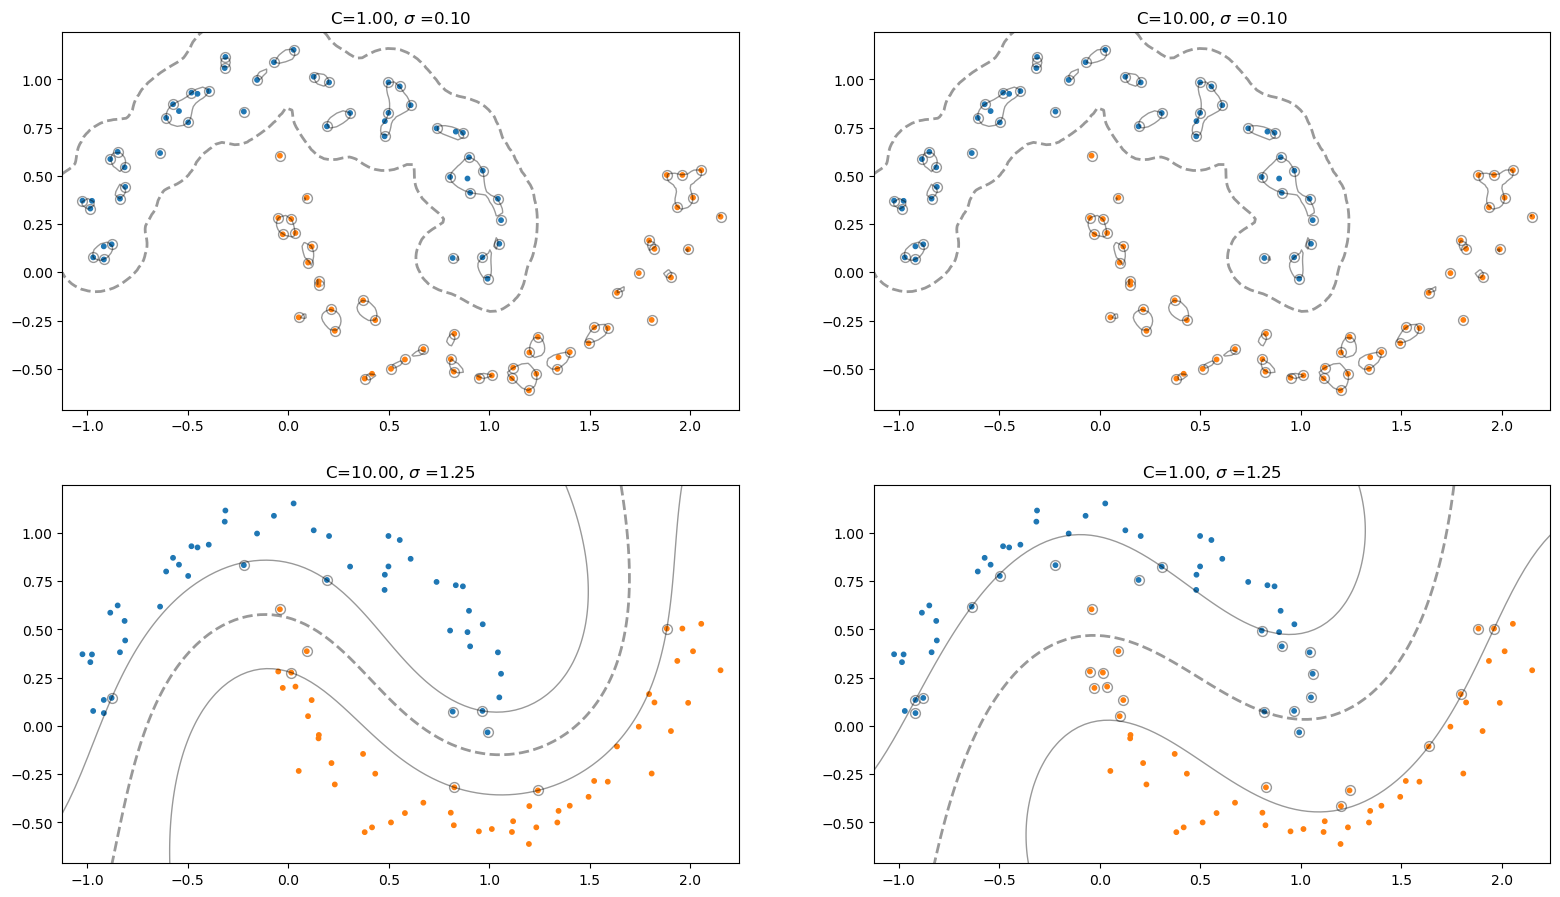

In [7]:
X, y, xbounds, ybounds = utils.get_data(name="moons", n=100)
print("#########")
good_sigma = utils.find_sigma(X)
print("good sigma: s%.2f (gamm=%.2f)" % (good_sigma, utils.get_gamma(good_sigma)))
print("#########")

fig, axes = plt.subplots(2,2, figsize=(19.2,10.8))
axes = axes.ravel()
def run(sigma, c_param, ax):
    model = SVC(C=c_param, kernel="rbf", gamma=utils.get_gamma(sigma))
    model.fit(X, y)
    print("#########")
    print("RBF kernel: C=%.2f, sigma=%.2f" % (c_param, sigma))
    print("#########")
    utils.apply_cross_validation(model, X, y)
    utils.decision_boundary(ax, model, X, y, xbounds, ybounds, margin=0.1)
    ax.set_title(r"C=%.2f, $\sigma$ =%.2f" % (c_param, sigma))

run(sigma=0.1, c_param=1, ax=axes[0])
run(sigma=0.1, c_param=10, ax=axes[1])
run(sigma=good_sigma, c_param=10, ax=axes[2])
run(sigma=good_sigma, c_param=1, ax=axes[3])
plt.show()

Here as $\sigma$, is too small the model is overfitting

#########
good sigma: s1.25 (gamm=0.63)
#########
#########
RBF kernel: C=1.00, sigma=10.00
#########
fold 0: 0.300000%
fold 1: 0.000000%
fold 2: 0.300000%
fold 3: 0.200000%
fold 4: 0.250000%
risk: 0.210000
#########
RBF kernel: C=10.00, sigma=10.00
#########
fold 0: 0.200000%
fold 1: 0.000000%
fold 2: 0.150000%
fold 3: 0.200000%
fold 4: 0.200000%
risk: 0.150000
#########
RBF kernel: C=10.00, sigma=1.25
#########
fold 0: 0.000000%
fold 1: 0.000000%
fold 2: 0.000000%
fold 3: 0.000000%
fold 4: 0.000000%
risk: 0.000000
#########
RBF kernel: C=1.00, sigma=1.25
#########
fold 0: 0.100000%
fold 1: 0.000000%
fold 2: 0.000000%
fold 3: 0.000000%
fold 4: 0.100000%
risk: 0.040000


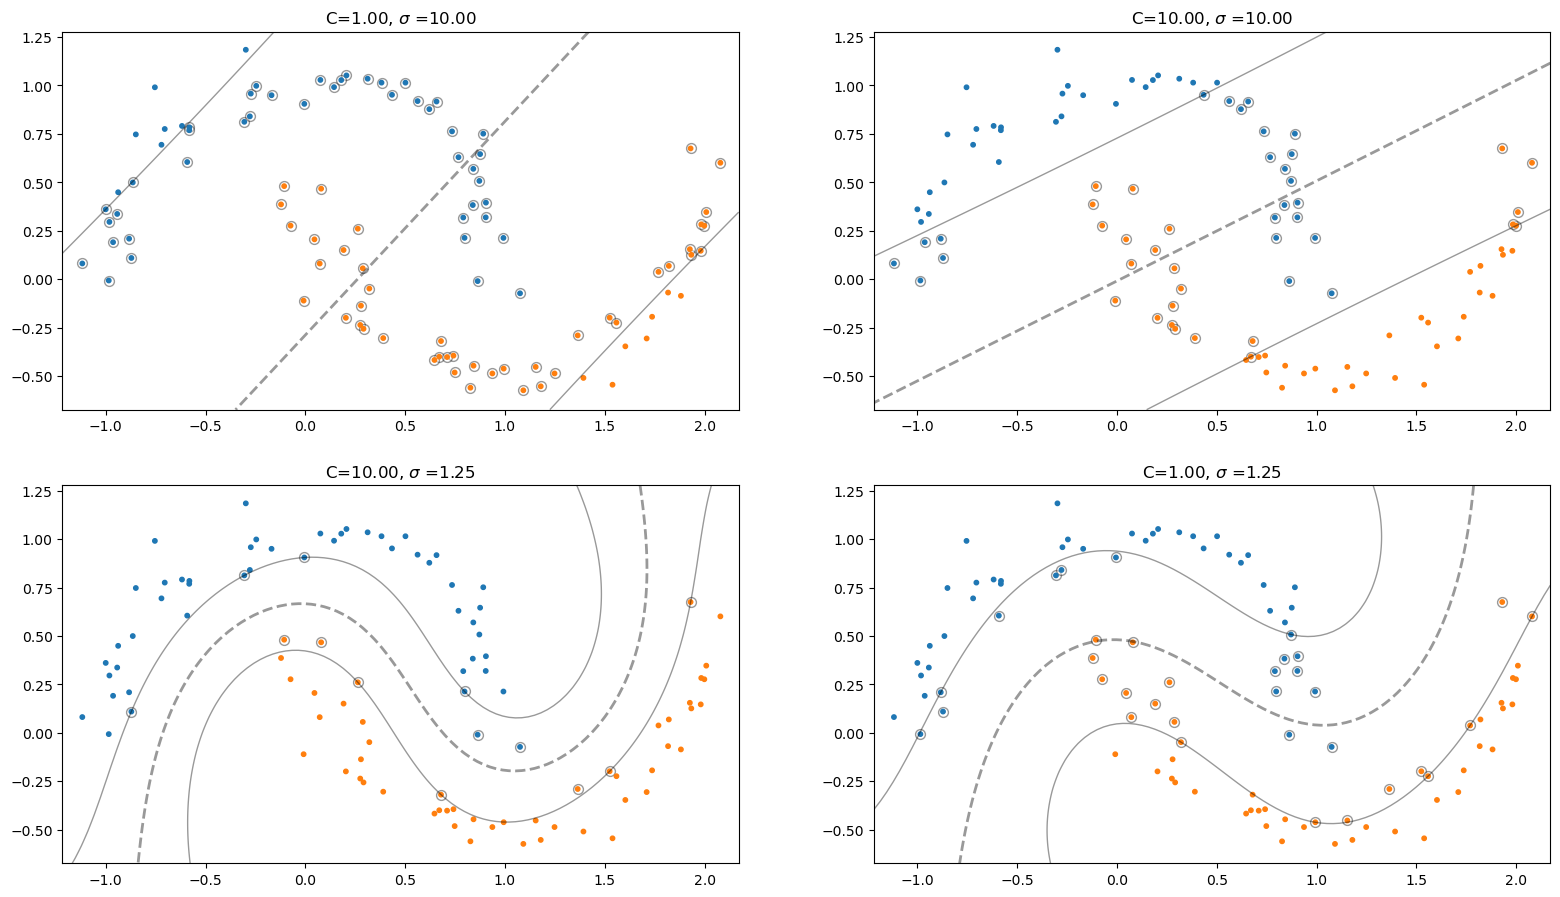

In [8]:
X, y, xbounds, ybounds = utils.get_data(name="moons", n=100)
print("#########")
good_sigma = utils.find_sigma(X)
print("good sigma: s%.2f (gamm=%.2f)" % (good_sigma, utils.get_gamma(good_sigma)))
print("#########")

fig, axes = plt.subplots(2,2, figsize=(19.2,10.8))
axes = axes.ravel()
def run(sigma, c_param, ax):
    model = SVC(C=c_param, kernel="rbf", gamma=utils.get_gamma(sigma))
    model.fit(X, y)
    print("#########")
    print("RBF kernel: C=%.2f, sigma=%.2f" % (c_param, sigma))
    print("#########")
    utils.apply_cross_validation(model, X, y)
    utils.decision_boundary(ax, model, X, y, xbounds, ybounds, margin=0.1)
    ax.set_title(r"C=%.2f, $\sigma$ =%.2f" % (c_param, sigma))

run(sigma=10, c_param=1, ax=axes[0])
run(sigma=10, c_param=10, ax=axes[1])
run(sigma=good_sigma, c_param=10, ax=axes[2])
run(sigma=good_sigma, c_param=1, ax=axes[3])
plt.show()

$\sigma$ is too large. Thus the model is underfitting